<a href="https://colab.research.google.com/github/Indraneel99/bear_classifier/blob/master/bear_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
key='33f95e6a26034a9ebde92290b01df8e0'

In [ ]:
search_images_bing

<function fastbook.search_images_bing>

In [ ]:
bear_types = 'grizzly','black','teddy'
path = Path('bear')

In [ ]:
if not path.exists():
 path.mkdir()
 for o in bear_types:
     dest = (path/o)
     dest.mkdir(exist_ok=True)
     results = search_images_bing(key, f'{o} bear')
     download_images(dest, urls=results.attrgot('content_url'))

In [ ]:

fns = get_image_files(path)

In [ ]:
fns

(#415) [Path('bear/grizzly/00000091.jpg'),Path('bear/grizzly/00000063.jpg'),Path('bear/grizzly/00000043.jpg'),Path('bear/grizzly/00000085.jpg'),Path('bear/grizzly/00000023.jpg'),Path('bear/grizzly/00000110.jpg'),Path('bear/grizzly/00000094.jpg'),Path('bear/grizzly/00000016.jpg'),Path('bear/grizzly/00000000.jpg'),Path('bear/grizzly/00000141.png')...]

In [ ]:
failed = verify_images(fns)
failed

(#0) []

In [ ]:
failed

(#12) [Path('bear/teddy/00000101.jpg'),Path('bear/teddy/00000146.jpg'),Path('bear/teddy/00000122.jpg'),Path('bear/teddy/00000023.jpg'),Path('bear/teddy/00000092.jpg'),Path('bear/teddy/00000088.jpg'),Path('bear/black/00000069.jpg'),Path('bear/black/00000057.jpg'),Path('bear/grizzly/00000054.jpg'),Path('bear/grizzly/00000142.jpg')...]

In [ ]:
failed.map(Path.unlink)

(#23) [None,None,None,None,None,None,None,None,None,None...]

In [ ]:
bear = DataBlock(
     blocks=(ImageBlock, CategoryBlock),
      get_items=get_image_files,
       splitter=RandomSplitter(valid_pct=0.2, seed=42),
        get_y=parent_label,
          item_tfms=Resize(128))

In [ ]:
d = bear.dataloaders(path)

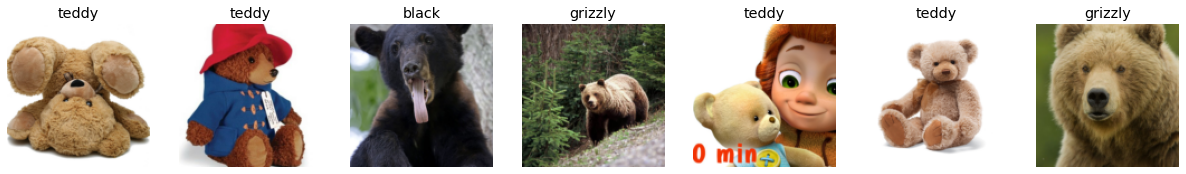

In [ ]:
d.valid.show_batch(max_n=7, nrows=1)

In [ ]:
bears= bear.new(item_tfms=Resize(128,ResizeMethod.Squish))

In [ ]:
d = bears.dataloaders(path)

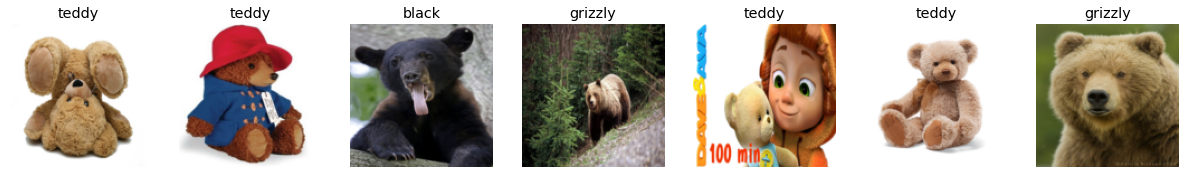

In [ ]:
d.valid.show_batch(max_n=7,nrows=1)

In [ ]:
bears= bear.new(item_tfms=Resize(128,ResizeMethod.Pad,pad_mode='zeros'))

In [ ]:
d = bears.dataloaders(path)

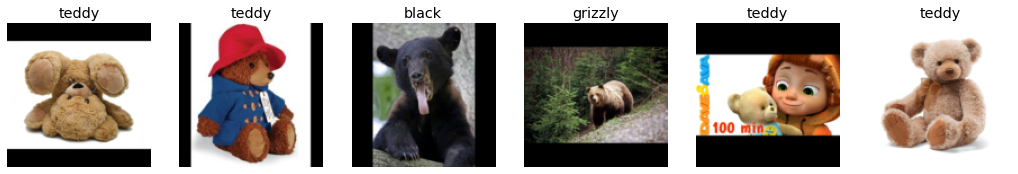

In [ ]:
d.valid.show_batch(max_n=6,nrows=1)

In [ ]:
bear = bears.new(item_tfms=RandomResizedCrop(128,min_scale=0.5))

In [ ]:
dls = bear.dataloaders(path)

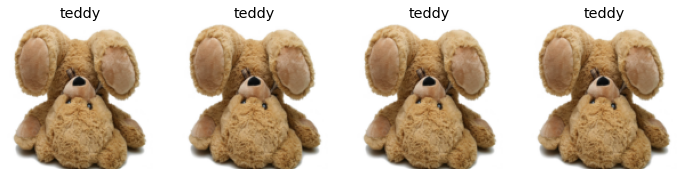

In [ ]:
dls.valid.show_batch(max_n=4,nrows=1,unique=True)

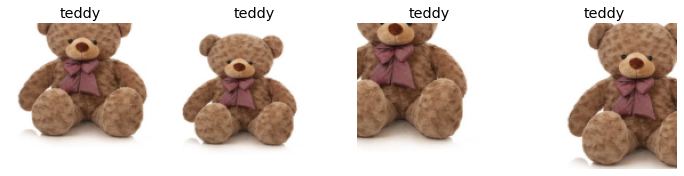

In [ ]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [ ]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))

In [ ]:
dls = bears.dataloaders(path)

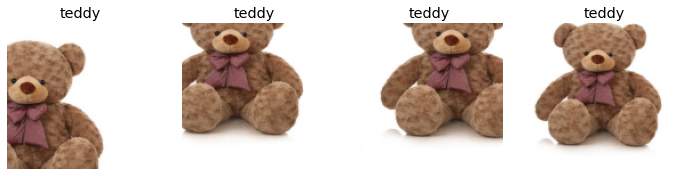

In [ ]:
dls.train.show_batch(max_n=4, nrows=1, unique=True)

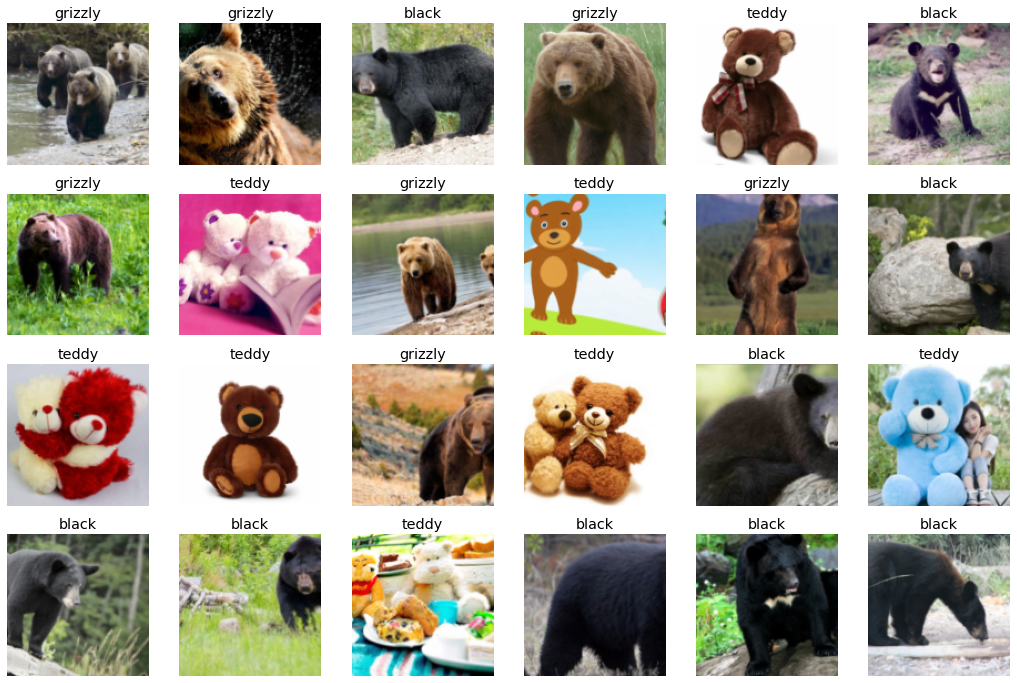

In [ ]:
bears= bears.new(item_tfms=Resize(128),batch_tfms=aug_transforms(mult=1))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=24,nrows=4)


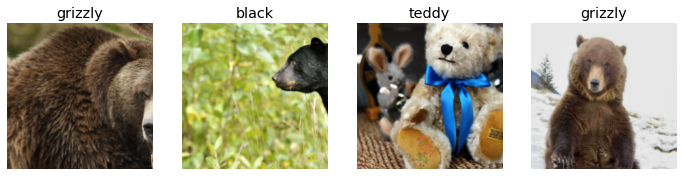

In [ ]:
bear = bear.new(item_tfms=RandomResizedCrop(224,min_scale=0.5), batch_tfms=aug_transforms())
dls = bear.dataloaders(path)
dls.train.show_batch(max_n=4,nrows=1)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics= error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


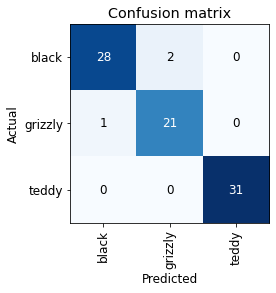

In [ ]:
intt = ClassificationInterpretation.from_learner(learn)
intt.plot_confusion_matrix()

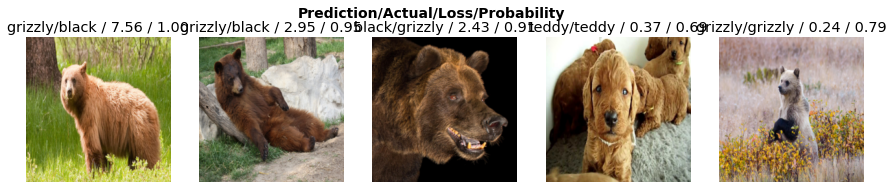

In [ ]:
intt.plot_top_losses(5,nrows=1)

In [ ]:
cleaner= ImageClassifierCleaner(learn)

In [ ]:
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [ ]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]),
path/cat)

In [ ]:
dls = bear.dataloaders(path)
learn = cnn_learner(dls, resnet18 , metrics=error_rate)
learn.fine_tune(4)

In [ ]:
learn.export()

In [ ]:
path = Path()

In [ ]:
path.ls(file_exts=' .pkl')

(#0) []

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
inf = load_learner(path/'export.pkl')

In [ ]:
inf.predict('bear/')

NameError: ignored

In [ ]:
results = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('content_url')
len(ims)

150

In [ ]:
dest = 'images/grizzly.jpg'

In [ ]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)


FileNotFoundError: ignored

In [ ]:
path = Path('images')

In [ ]:
if not path.exists():
  path.mkdir()

In [ ]:
dest = (path/'grizzly.jpg')

In [ ]:
dest.mkdir(exist_ok=True)

In [ ]:
download_images(dest, urls=results.attrgot('content_url'))

IsADirectoryError: ignored

In [ ]:
dest = 'kyg'

In [ ]:
download_url(ims[0],dest)

In [ ]:
download_images(dest, urls=results.attrgot('content_url'))

In [ ]:
inf.predict(dest/'00000001.jpg')

('grizzly', tensor(1), tensor([1.0575e-08, 1.0000e+00, 3.7135e-09]))

In [ ]:
dest = kyc
download_url(ims[0], 'dest/grizzly.jpg')

NameError: ignored

In [ ]:
dest = 'bear/image.jpg'
download_url(ims[0], dest)

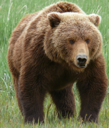

In [ ]:
im = Image.open(dest)
im.to_thumb(128,128)

In [ ]:
inf.predict(dest)

NameError: ignored

In [ ]:
inf.vocab()

In [ ]:
inf.dls.vocab

(#3) ['black','grizzly','teddy']

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1
                                      
                                      ])

In [ ]:
out = widgets.Output()
out.clear_output()
with out: display(img.to_thumb(128,128))
out

Output()

In [ ]:
pred,pred_idx,probs= inf.predict(img)

In [ ]:
pred

'grizzly'

In [ ]:
pred_idx

tensor(1)

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability:{probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability:0.9989')

In [ ]:
btn_run = widgets.Button(description = 'classify')
btn_run

Button(description='classify', style=ButtonStyle())

NameError: ignored

NameError: ignored

NameError: ignored

NameError: ignored

NameError: ignored

NameError: ignored

In [ ]:
def on_click_classify(change):
 img = PILImage.create(btn_upload.data[-1])
 out.clear_output()
 with out: display(img.to_thumb(128,128))
 pred,pred_idx,probs = inf.predict(img)
 lbl_pred.value = f'Prediction: {pred}; Probability:{probs[pred_idx]:.04f}'
btn_run.on_click(on_click_classify)


In [ ]:
VBox([widgets.Label('Select your bear!'),
 btn_upload, btn_run, out, lbl_pred])